In [1]:
import time
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from osmnx import project_gdf

/Users/claudio/.pyenv/versions/peru-connect-env/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
from pathlib import Path

In [119]:
dfs = [pd.read_csv(fs, index_col=0) for fs in Path('outputs/clean').iterdir() if fs.name.endswith('.csv') and fs.name.startswith('geocoded_')]

In [135]:
list(Path('outputs/clean').iterdir())

[PosixPath('outputs/clean/geocoded_df_left_with_names.csv'),
 PosixPath('outputs/clean/geocoded_df_retry_nominatim_vb.csv'),
 PosixPath('outputs/clean/geocoded_df_sin_direccion_ni_mzn_vb.csv'),
 PosixPath('outputs/clean/geocoded_df_sin_direc_ni_mzn_vb_retry.csv'),
 PosixPath('outputs/clean/.ipynb_checkpoints'),
 PosixPath('outputs/clean/geocoded_df.csv')]

In [183]:
# Add columns specifying source dataset label
dfs[4]['dataset'] = 'nominatim=address+number'
dfs[1]['dataset'] = 'nominatim=address-number+viewbox'
dfs[2]['dataset'] = 'nominatim=incomplete_address+viewbox'
dfs[3]['dataset'] = 'nominatim=incomplete_address'
dfs[0]['dataset'] = 'nominatim=firm_name'

In [184]:
len(geocoded_geojsons)

5

In [185]:
import pandas as pd

In [186]:
# Verify DataFrames indexes integrity
intersections = {}

for i in range(len(dfs)):
    for j in range(len(dfs)):
        if i != j:
            intersections[f'n_{i}_{j}'] = dfs[i].index.intersection(dfs[j])
            if intersections[f'n_{i}_{j}'].shape[0] > 0:
                print('df', i, 'n', 'df', ':')
                print(intersections[f'n_{i}_{j}'].shape)

In [187]:
# All lists should be empty!
intersections

{'n_0_1': Index([], dtype='object'),
 'n_0_2': Index([], dtype='object'),
 'n_0_3': Index([], dtype='object'),
 'n_0_4': Index([], dtype='object'),
 'n_1_0': Index([], dtype='object', name='index'),
 'n_1_2': Index([], dtype='object', name='index'),
 'n_1_3': Index([], dtype='object', name='index'),
 'n_1_4': Index([], dtype='object', name='index'),
 'n_2_0': Index([], dtype='object', name='index'),
 'n_2_1': Index([], dtype='object', name='index'),
 'n_2_3': Index([], dtype='object', name='index'),
 'n_2_4': Index([], dtype='object', name='index'),
 'n_3_0': Index([], dtype='object', name='index'),
 'n_3_1': Index([], dtype='object', name='index'),
 'n_3_2': Index([], dtype='object', name='index'),
 'n_3_4': Index([], dtype='object', name='index'),
 'n_4_0': Index([], dtype='object'),
 'n_4_1': Index([], dtype='object'),
 'n_4_2': Index([], dtype='object'),
 'n_4_3': Index([], dtype='object')}

In [188]:
# Concatenate and double check index integrity (i.e. no duplicates)
geocoded_concatenate = pd.concat(dfs, verify_integrity=True)

In [189]:
geocoded_concatenate.index.duplicated().sum()

0

In [190]:
geocoded_concatenate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183835 entries, 25034 to 240147
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   place_id      183835 non-null  float64
 1   licence       183835 non-null  object 
 2   osm_type      183831 non-null  object 
 3   osm_id        183831 non-null  float64
 4   boundingbox   183835 non-null  object 
 5   lat           183835 non-null  float64
 6   lon           183835 non-null  float64
 7   display_name  183835 non-null  object 
 8   class         183835 non-null  object 
 9   type          183835 non-null  object 
 10  importance    183835 non-null  float64
 11  dataset       183835 non-null  object 
dtypes: float64(5), object(7)
memory usage: 22.3+ MB


In [191]:
geocoded_concatenate.head()

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,dataset
25034,524744.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4.369564e+08,"['-12.2400468', '-12.2398043', '-76.9116742', ...",-12.239926,-76.911511,"Rufigas, Calle 2, Lurín, Lima, Lima Metropolit...",shop,hardware,0.401,nominatim=firm_name
81996,288080.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,5.893779e+09,"['-12.2139684', '-12.2138684', '-76.9273803', ...",-12.213918,-76.927330,"Inversiones Generales Cristemp S.A.C., Calle 3...",craft,glaziery,0.601,nominatim=firm_name
148002,163409.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,4.351303e+09,"['-12.2232687', '-12.2231687', '-76.9307066', ...",-12.223219,-76.930657,"Muebles, Avenida Revolución, Sector 3, Villa E...",shop,furniture,0.401,nominatim=firm_name
156068,538688.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4.376820e+08,"['-12.2366164', '-12.2364951', '-76.9125727', ...",-12.236555,-76.912471,"Mr. Chicken's, Avenida Lima, Villa El Salvador...",amenity,restaurant,0.701,nominatim=firm_name
174,535904.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,4.444755e+08,"['-12.2482356', '-12.245397', '-76.9402149', '...",-12.247127,-76.938686,"Volvo Perú, Carretera Panamericana Sur, Llanav...",shop,car,0.101,nominatim=firm_name


In [192]:
dfs_censo = [pd.read_csv(fs, index_col=0) for fs in Path('outputs/').iterdir() if fs.name.endswith('_censo_geocoded.csv')]

In [193]:
list(filter(lambda x: x.name.endswith('_censo_geocoded.csv'), Path('outputs/').iterdir()))

[PosixPath('outputs/df_not_georef_final_censo_geocoded.csv'),
 PosixPath('outputs/df_sin_direccion_censo_geocoded.csv'),
 PosixPath('outputs/df_retry_censo_geocoded.csv')]

In [194]:
# Verify DataFrames indexes integrity
intersections_censo = {}

for i in range(len(dfs_censo)):
    for j in range(len(dfs_censo)):
        if i != j:
            intersections_censo[f'n_{i}_{j}'] = dfs_censo[i].index.isin(dfs_censo[j]).sum()
            if intersections_censo[f'n_{i}_{j}'] > 0:
                print('df', i, 'n', 'df', j)
                print(intersections_censo[f'n_{i}_{j}'].shape)

In [195]:
intersections_censo

{'n_0_1': 0, 'n_0_2': 0, 'n_1_0': 0, 'n_1_2': 0, 'n_2_0': 0, 'n_2_1': 0}

In [203]:
# Concatenate and double check index integrity (i.e. no duplicates)
geocoded_concatenate_censo = pd.concat(dfs_censo)
geocoded_concatenate_censo['dataset'] = 'censo_2017_manzanas'

In [204]:
geocoded_concatenate_censo.index.duplicated().sum()

6

In [205]:
geocoded_concatenate_censo[geocoded_concatenate_censo.index.duplicated(keep=False)].sort_index()

,CNS_UBIGEO,CNS_ZONA_CENSAL,CNS_MZ_CENSAL,CNS_MZSUF_CENSAL,IDMANZANA,geometry,lon,lat,LATITUDE,LONGITUDE,dataset
index,,,,,,,,,,,
6502,150103,1000,17,NaN,15010301000017,NaN,NaN,NaN,-12.058358,-76.965297,censo_2017_manzanas
6502,150103,1000,17,NaN,15010301000017,NaN,NaN,NaN,-12.060352,-76.963878,censo_2017_manzanas
14873,150122,900,15,NaN,15012200900015,NaN,NaN,NaN,-12.120152,-77.027567,censo_2017_manzanas
14873,150122,900,15,NaN,15012200900015,NaN,NaN,NaN,-12.120141,-77.028308,censo_2017_manzanas
59513,150103,2100,14,NaN,15010302100014,NaN,NaN,NaN,-12.040637,-76.934480,censo_2017_manzanas
59513,150103,2100,14,NaN,15010302100014,NaN,NaN,NaN,-12.040775,-76.935103,censo_2017_manzanas
62386,150115,1500,44,NaN,15011501500044,NaN,NaN,NaN,-12.081561,-77.024563,censo_2017_manzanas
62386,150115,1500,44,NaN,15011501500044,NaN,NaN,NaN,-12.081533,-77.024925,censo_2017_manzanas
64135,150119,1100,49,NaN,15011901100049,NaN,NaN,NaN,-12.276784,-76.868954,censo_2017_manzanas


In [206]:
geocoded_concatenate_all = pd.concat([geocoded_concatenate_censo, geocoded_concatenate])

In [207]:
geocoded_concatenate_all.shape

(185837, 20)

In [208]:
geocoded_concatenate_censo.shape

(2002, 11)

In [209]:
dataset

NameError: name 'dataset' is not defined

In [210]:
geocoded_concatenate_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185837 entries, 73740 to 240147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CNS_UBIGEO        2002 non-null    float64
 1   CNS_ZONA_CENSAL   2002 non-null    float64
 2   CNS_MZ_CENSAL     2002 non-null    float64
 3   CNS_MZSUF_CENSAL  111 non-null     object 
 4   IDMANZANA         2002 non-null    object 
 5   geometry          637 non-null     object 
 6   lon               184472 non-null  float64
 7   lat               184472 non-null  float64
 8   LATITUDE          1365 non-null    float64
 9   LONGITUDE         1365 non-null    float64
 10  dataset           185837 non-null  object 
 11  place_id          183835 non-null  float64
 12  licence           183835 non-null  object 
 13  osm_type          183831 non-null  object 
 14  osm_id            183831 non-null  float64
 15  boundingbox       183835 non-null  object 
 16  display_name    

In [211]:
(geocoded_concatenate_all.isna().sum() / geocoded_concatenate_all.shape[0]) * 100

CNS_UBIGEO          98.922712
CNS_ZONA_CENSAL     98.922712
CNS_MZ_CENSAL       98.922712
CNS_MZSUF_CENSAL    99.940270
IDMANZANA           98.922712
geometry            99.657226
lon                  0.734515
lat                  0.734515
LATITUDE            99.265485
LONGITUDE           99.265485
dataset              0.000000
place_id             1.077288
licence              1.077288
osm_type             1.079441
osm_id               1.079441
boundingbox          1.077288
display_name         1.077288
class                1.077288
type                 1.077288
importance           1.077288
dtype: float64

In [214]:
geocoded_concatenate_all['lat'] = geocoded_concatenate_all['lat'].fillna(geocoded_concatenate_all['LATITUDE'])
geocoded_concatenate_all['lon'] = geocoded_concatenate_all['lon'].fillna(geocoded_concatenate_all['LONGITUDE'])

In [215]:
geocoded_concatenate_all.columns

Index(['CNS_UBIGEO', 'CNS_ZONA_CENSAL', 'CNS_MZ_CENSAL', 'CNS_MZSUF_CENSAL',
       'IDMANZANA', 'geometry', 'lon', 'lat', 'LATITUDE', 'LONGITUDE',
       'dataset', 'place_id', 'licence', 'osm_type', 'osm_id', 'boundingbox',
       'display_name', 'class', 'type', 'importance'],
      dtype='object')

In [256]:
df_nominatim_cloud = pd.read_csv('outputs/geocoded_df_all_batches.csv', index_col=0)

In [257]:
df_nominatim_cloud.shape

(5967, 12)

In [258]:
intersected_ixs = df_nominatim_cloud.index.intersection(geocoded_concatenate_all.index)
df_nominatim_cloud = df_nominatim_cloud.drop(intersected_ixs)

In [259]:
df_nominatim_cloud.shape

(5887, 12)

In [261]:
df_nominatim_cloud.head()

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon
54865,130900549.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,128179308.0,"['-8.36959', '-8.3691952', '-74.5472651', '-74...",-8.369590,-74.547265,"Calle 1, Fray Martín, Pucallpa, Callería, Coro...",highway,residential,0.5,NaN
56480,130900549.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,128179308.0,"['-8.36959', '-8.3691952', '-74.5472651', '-74...",-8.369590,-74.547265,"Calle 1, Fray Martín, Pucallpa, Callería, Coro...",highway,residential,0.6,NaN
69243,135598356.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,148119118.0,"['-8.3836828', '-8.3829641', '-74.5509072', '-...",-8.383683,-74.550698,"Pasaje San Miguel, Micaela Bastidas, Fray Mart...",highway,residential,0.7,NaN
74831,170499755.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,286645944.0,"['-8.3855327', '-8.3824841', '-74.5323757', '-...",-8.383775,-74.530525,"Jirón Tarapacá, Centro Urbano de Pucallpa, Puc...",highway,tertiary,0.4,NaN
75931,132551132.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,134725129.0,"['-8.3722317', '-8.3677668', '-74.5592225', '-...",-8.370207,-74.551393,"Avenida Miraflores, Nueve de Abril, Las Alamed...",highway,tertiary,0.7,NaN


In [263]:
df_nominatim_cloud.shape

(5887, 12)

In [260]:
geocoded_concatenate_final = pd.concat([geocoded_concatenate_all, df_nominatim_cloud])

In [264]:
geocoded_concatenate_final.shape

(191724, 21)

In [265]:
pd.read_stata('inputs/rucs_firmas_20142020_v2.dta').shape

(240151, 31)

In [266]:
240151 - 191724

48427

In [267]:
48427 / 240151

0.20165229376517274

In [268]:
191724 / 240151

0.7983477062348272

In [262]:
geocoded_df = geocoded_concatenate_final[['IDMANZANA', 'lon', 'lat', 'dataset',
                          'place_id', 'osm_type', 'osm_id', 'display_name',
                          'class', 'type']]

In [271]:
geocoded_gdf = gpd.GeoDataFrame(
    data=geocoded_df,
    geometry=gpd.points_from_xy(geocoded_df['lon'], geocoded_df['lat']),
    crs='EPSG:4326'
)

In [272]:
ccpp_osiptel = gpd.read_file('inputs/cp_osiptel')

<AxesSubplot:>

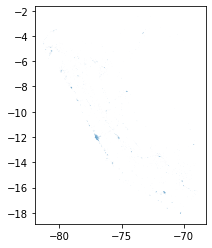

In [291]:
ccpp_osiptel.plot()

In [273]:
ccpp_osiptel.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        1171 non-null   object  
 1   descriptio  0 non-null      object  
 2   timestamp   0 non-null      object  
 3   begin       0 non-null      object  
 4   end         0 non-null      object  
 5   altitudeMo  0 non-null      object  
 6   tessellate  1171 non-null   int64   
 7   extrude     1171 non-null   int64   
 8   visibility  1171 non-null   int64   
 9   drawOrder   0 non-null      object  
 10  icon        0 non-null      object  
 11  layer       1171 non-null   object  
 12  path        1171 non-null   object  
 13  geometry    1171 non-null   geometry
dtypes: geometry(1), int64(3), object(10)
memory usage: 128.2+ KB


In [274]:
geocoded_gdf_proj = project_gdf(geocoded_gdf)
ccpp_osiptel_proj = project_gdf(ccpp_osiptel)
print('have same proj:', geocoded_gdf_proj.crs == ccpp_osiptel_proj.crs)

have same proj: True


In [275]:
geocoded_gdf_proj.shape

(191724, 11)

In [276]:
print('Assign polygon to points observations (Spatial Join - nearest)')
start = time.time()
geocoded_gdf_nearest_ccpp = geocoded_gdf_proj.sjoin_nearest(
    right=ccpp_osiptel_proj[['Name','geometry']],
    how='inner',
    distance_col='distance_to_cp',
)
print('Elapsed time:', round(time.time() - start,2), 'seconds')

Assign polygon to points observations (Spatial Join - nearest)
Elapsed time: 31.72 seconds


In [277]:
geocoded_gdf_nearest_ccpp.shape

(191736, 14)

In [278]:
geocoded_gdf.dropna(subset='geometry').shape, geocoded_gdf_nearest_ccpp.shape

((191724, 11), (191736, 14))

In [279]:
duplicates_bool = geocoded_gdf_nearest_ccpp.index.duplicated()
duplicates_ixs = geocoded_gdf_nearest_ccpp.index[duplicates_bool]

In [280]:
len(duplicates_ixs.unique())

18

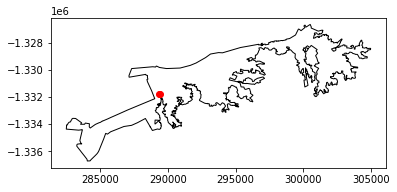

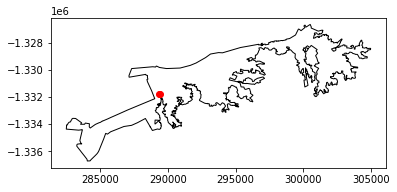

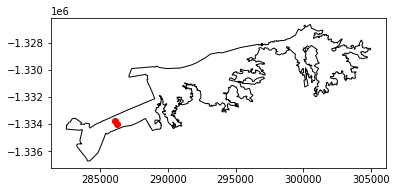

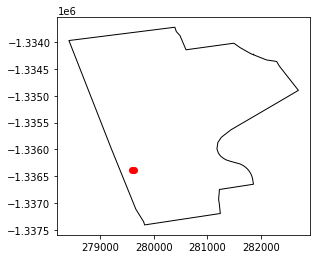

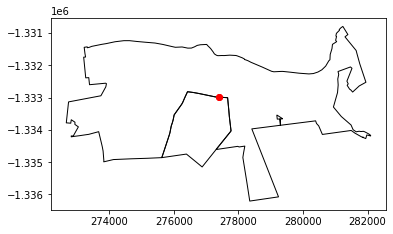

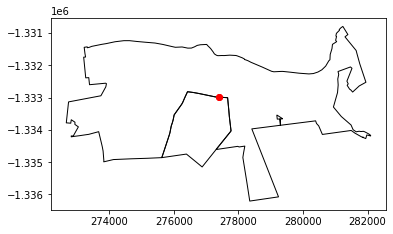

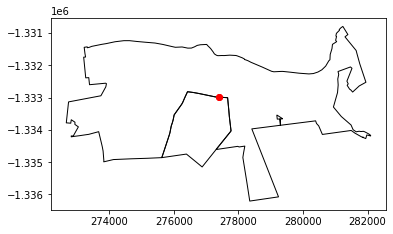

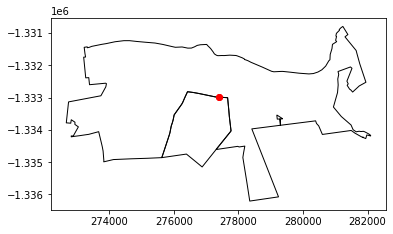

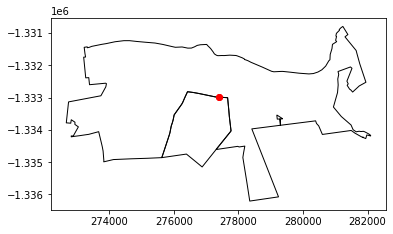

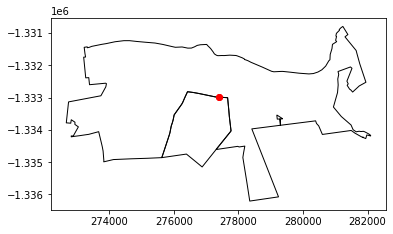

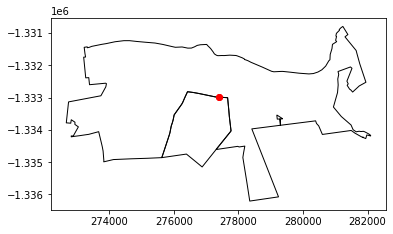

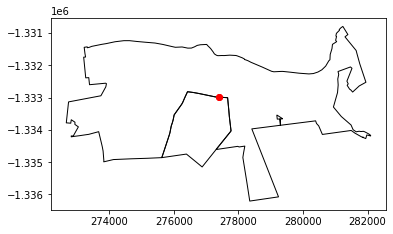

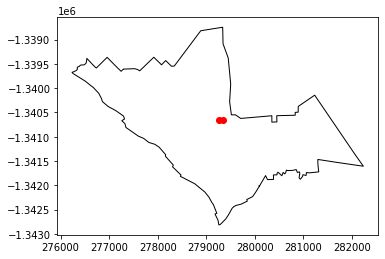

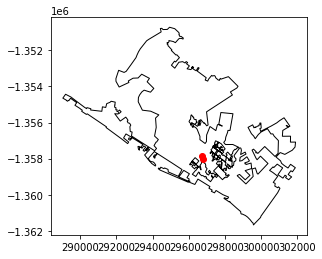

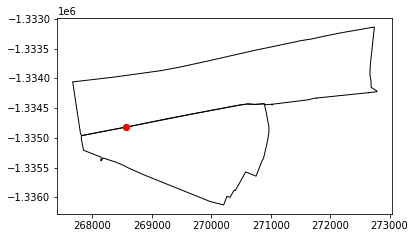

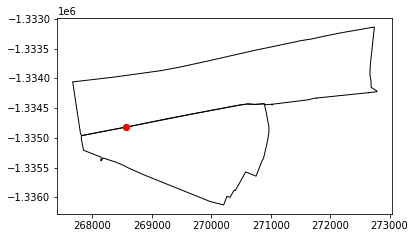

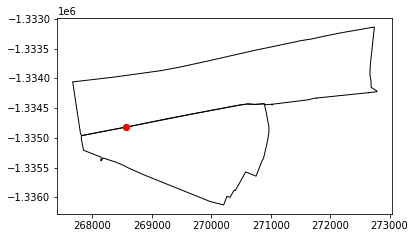

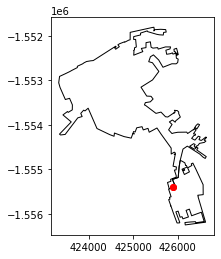

In [281]:
for ixs in duplicates_ixs: 
    rows = geocoded_gdf_nearest_ccpp.loc[ixs]
    ax = ccpp_osiptel_proj[ccpp_osiptel_proj['Name'].isin(rows['Name'].values)].plot(
        edgecolor='k',
        facecolor='none'
    )
    rows.plot(ax=ax, color='r')
    plt.show()

### Check distances greater than 0

In [282]:
distance_to_cp = geocoded_gdf_nearest_ccpp[geocoded_gdf_nearest_ccpp['distance_to_cp']>0]['distance_to_cp']

In [283]:
distance_to_cp.shape

(9184,)

In [284]:
distance_to_cp.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2)

count      9184.00
mean       6182.49
std        9206.69
min           0.01
10%          42.79
20%         379.20
30%        1117.20
40%        1647.96
50%        3223.66
60%        4868.12
70%        6730.68
80%       10103.43
90%       16756.82
max      257950.94
Name: distance_to_cp, dtype: float64

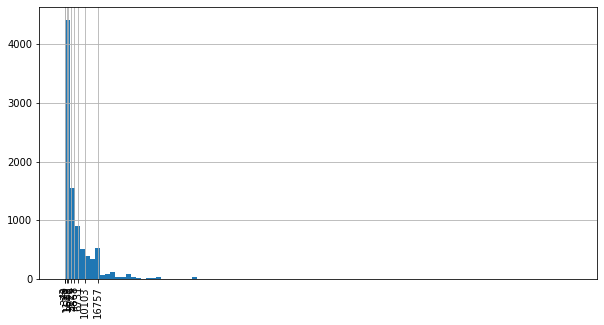

In [285]:
distance_to_cp.hist(bins=100, figsize=(10,5))
plt.xticks(distance_to_cp.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).round(2).values, rotation=90)
plt.show()

In [286]:
# Points at a distances greater than 1km
(distance_to_cp > 1000).sum(), (distance_to_cp > 1000).sum() / distance_to_cp.shape[0] * 100

(6510, 70.88414634146342)

In [287]:
# Points at a distances greater than 1km
(distance_to_cp > 2000).sum(), (distance_to_cp > 2000).sum() / distance_to_cp.shape[0] * 100

(4971, 54.12674216027874)

In [288]:
geocoded_gdf_nearest_ccpp.to_file("geocoded_df_ccpp.geojson", driver="GeoJSON")

/Users/claudio/.pyenv/versions/peru-connect-env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [289]:
geocoded_gdf_nearest_ccpp.to_csv("outputs/geocoded_df_ccpp.geojson.csv")